In [1]:
import matplotlib.pyplot as plt
from __future__ import print_function
from scipy.optimize import curve_fit
import numpy as np
from scipy.signal import convolve2d as conv2
from scipy.special import wofz
from skimage import color, data, restoration
from STEMhandler import importEELS
from EELSFits import geteVrange
from RL_deconvolution import RL_deconvl
from STEMFactorize import PCA



def gaus(x, A, mu, sigma):
    return A* np.exp(-1/2 * ((x - mu) / sigma) ** 2)

def lor(x, A, mu, Gamma):
    return (A * (Gamma/2)**2 )/ ((x - mu)**2 + ((1/2) * Gamma)**2)

def pvoigt(x, A, mu, Gamma, n):
    sigma = Gamma / (2 * np.sqrt(2 * np.log(2)))
    return (n * gaus(x, A, mu, sigma) + (1 - n) * lor(x, A, mu, Gamma))

'''these are the testing plots for the gaussian, Lorentzian, and Voigt function.'''
# x_test = np.linspace(-20,20,201)
# plt.plot(x_test,gaus(x_test,1,0,10/2.2),label='Gaussian')
# plt.plot(x_test,lor(x_test,1,0,10),label='lor')
# plt.plot(x_test,pvoigt(x_test,1,10,0.5),label= 'voigt')
# plt.legend()
# plt.show()
# plt.clf()

'these are the testing plots for the gaussian, Lorentzian, and Voigt function.'

In [2]:

path = "/Users/jiatizhao/Desktop/Chait's_library"
name = 'EELS_Spectrum_Image_(high_loss)(aligned).dm4'
VibData = importEELS(name,path,[2,2])
# VibData.normalize(axis=2, sum =True)

data1d = importEELS('Vacuum_60kV.csv',path,[1,1])


ZLP =  'ZLP_data.dm4'
# ZLP = np.genfromtxt(ZLP + ".csv", delimiter=',').T
ZLPdata = importEELS(ZLP,path,[2,2])

E_axis = VibData.getEnergyAxis()

before_pca = VibData.dataset

pca = PCA(d = 10, data = VibData.dataND())
VibData.PCAfilter(5)
after_pca = VibData.dataset

ZLPdata.normalize(axis=2,sum=True)
ZLP = ZLPdata.dataset

ZLPdata.dims,VibData.dims
# plt.plot( data1d.dataset[0,0])
ZLP_engery = ZLPdata.getEnergyAxis()
type(data1d),data1d.dims[0:2]


(STEMhandler.importEELS, (1, 1))

In [3]:
# from dask.distributed import Client
RL = VibData.RL(kerneltype=4,ZLP_data = ZLPdata)

# E_axis = VibData.getEnergyAxis()
# client = Client()
# futures = client.submit(restoration.richardson_lucy, Raw_data, ZLP, 30)
# RL_all = np.array([[i.result() for i in future] for future in futures])
# RL_all = np.array(futures.result() )

# RL_all_before = list(map(restoration.richardson_lucy , before_pca[50:60,50:60], ZLP[50:60,50:60]))
# RL_all_after = list(map(restoration.richardson_lucy , after_pca[:10,:10], ZLP[:10,:10],num_iter=1))


# RL = RL_deconvl(E_axis,after_pca[0,0], ZLP_data = [ZLP_engery,ZLP[0,0]],kerneltype=4,FWHM=2,iterations=10, algo = 'hyperspy')



<class 'STEMhandler.importEELS'>


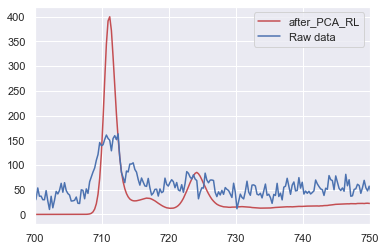

<Figure size 432x288 with 0 Axes>

In [5]:
plt.plot( E_axis, RL[4,4], color= 'r',label = 'after_PCA_RL')
plt.plot(E_axis, before_pca[4,4] ,color='b',label = 'Raw data')
# plt.plot(E_axis, ZLP[4,4] ,color='y',label = 'ZLP data')
plt.xlim(700,750)
plt.legend()
plt.show()
plt.clf()



In [3]:

RL2 = VibData.RL(kerneltype=4,ZLP_data = data1d)

<class 'STEMhandler.importEELS'>


In [ ]:
plt.plot( E_axis, RL2[4,4], color= 'r',label = 'after_PCA_RL')
plt.plot(E_axis, before_pca[4,4] ,color='b',label = 'Raw data')
# plt.plot(E_axis, ZLP[4,4] ,color='y',label = 'ZLP data')
plt.xlim(700,750)
plt.legend()
plt.show()
plt.clf()

NameError: name 'np' is not defined

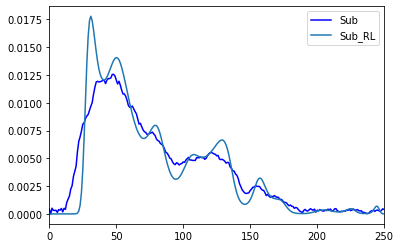

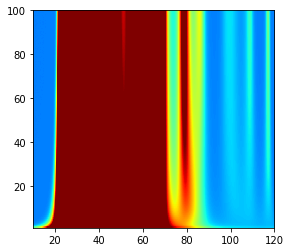

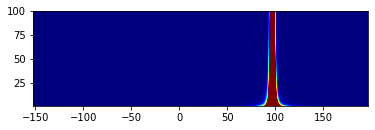

<Figure size 432x288 with 0 Axes>

In [5]:
data = np.genfromtxt('20220222_BFO-TSO ajmo28_core+band_10_DDW phonon linescan_BFO298.csv', delimiter=',').T
x = data[0]
dataset = data[1:]
RL_deconvl(x, dataset[0], kerneltype=4, ZLP_path=ZLP,iteration=50)

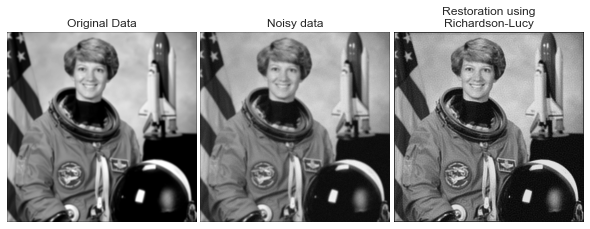

(512, 512)


In [48]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import convolve2d as conv2

from skimage import color, data, restoration

rng = np.random.default_rng()

astro = color.rgb2gray(data.astronaut())

psf = np.ones((5, 5)) / 25
astro = conv2(astro, psf, 'same')
# Add Noise to Image
astro_noisy = astro.copy()
astro_noisy += (rng.poisson(lam=25, size=astro.shape) - 10) / 255.

# Restore Image using Richardson-Lucy algorithm
deconvolved_RL = restoration.richardson_lucy(astro_noisy, psf, 30)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(astro)
ax[0].set_title('Original Data')

ax[1].imshow(astro_noisy)
ax[1].set_title('Noisy data')

ax[2].imshow(deconvolved_RL, vmin=astro_noisy.min(), vmax=astro_noisy.max())
ax[2].set_title('Restoration using\nRichardson-Lucy')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()
print(astro_noisy.shape)